In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:
dataset = pd.read_csv(r"C:\Users\samee\Desktop\datasets\hier.csv")
dataset

country  literacy    GDP
0         Alabama       NaN    NaN
1          Alaska       NaN    NaN
2         Arizona       NaN    NaN
3        Arkansas       NaN    NaN
4      California     18.77  32.96
5        Colorado       NaN    NaN
6     Connecticut     53.18  53.86
7        Delaware      2.11  23.71
8         Florida       NaN    NaN
9         Georgia       NaN    NaN
10         Hawaii       NaN    NaN
11          Idaho       NaN    NaN
12       Illinois     40.25  50.68
13        Indiana     40.03  51.09
14           Iowa     49.13  54.87
15         Kansas       NaN    NaN
16       Kentucky      0.26   0.93
17      Louisiana       NaN    NaN
18          Maine     61.37  64.15
19       Maryland      0.32   3.11
20  Massachusetts     64.72  62.75
21       Michigan     56.98  57.18
22      Minnesota       NaN  63.42
23    Mississippi       NaN    NaN
24       Missouri       NaN  10.29
25        Montana       NaN    NaN
26       Nebraska       NaN    NaN
27         Nevada       NaN    NaN
28  New Hampshire     53.59  56.89
29     New Jersey     28.52  48.13

In [24]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(dataset[['literacy','GDP']])
dataset[['literacy','GDP']]=imputer.transform(dataset[['literacy','GDP']])
dataset

country   literacy     GDP
0         Alabama  36.094615  42.268
1          Alaska  36.094615  42.268
2         Arizona  36.094615  42.268
3        Arkansas  36.094615  42.268
4      California  18.770000  32.960
5        Colorado  36.094615  42.268
6     Connecticut  53.180000  53.860
7        Delaware   2.110000  23.710
8         Florida  36.094615  42.268
9         Georgia  36.094615  42.268
10         Hawaii  36.094615  42.268
11          Idaho  36.094615  42.268
12       Illinois  40.250000  50.680
13        Indiana  40.030000  51.090
14           Iowa  49.130000  54.870
15         Kansas  36.094615  42.268
16       Kentucky   0.260000   0.930
17      Louisiana  36.094615  42.268
18          Maine  61.370000  64.150
19       Maryland   0.320000   3.110
20  Massachusetts  64.720000  62.750
21       Michigan  56.980000  57.180
22      Minnesota  36.094615  63.420
23    Mississippi  36.094615  42.268
24       Missouri  36.094615  10.290
25        Montana  36.094615  42.268
26       Nebraska  36.094615  42.268
27         Nevada  36.094615  42.268
28  New Hampshire  53.590000  56.890
29     New Jersey  28.520000  48.130

In [25]:
X = dataset.iloc[:, 1:].values
X

array([[36.09461538, 42.268     ],
       [36.09461538, 42.268     ],
       [36.09461538, 42.268     ],
       [36.09461538, 42.268     ],
       [18.77      , 32.96      ],
       [36.09461538, 42.268     ],
       [53.18      , 53.86      ],
       [ 2.11      , 23.71      ],
       [36.09461538, 42.268     ],
       [36.09461538, 42.268     ],
       [36.09461538, 42.268     ],
       [36.09461538, 42.268     ],
       [40.25      , 50.68      ],
       [40.03      , 51.09      ],
       [49.13      , 54.87      ],
       [36.09461538, 42.268     ],
       [ 0.26      ,  0.93      ],
       [36.09461538, 42.268     ],
       [61.37      , 64.15      ],
       [ 0.32      ,  3.11      ],
       [64.72      , 62.75      ],
       [56.98      , 57.18      ],
       [36.09461538, 63.42      ],
       [36.09461538, 42.268     ],
       [36.09461538, 10.29      ],
       [36.09461538, 42.268     ],
       [36.09461538, 42.268     ],
       [36.09461538, 42.268     ],
       [53.59      ,

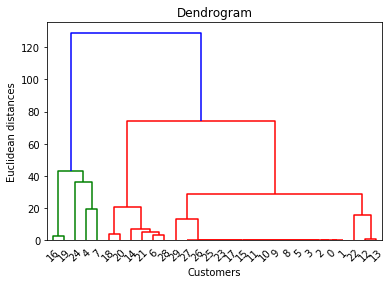

In [26]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

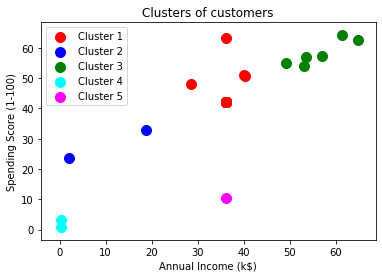

In [28]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
